In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


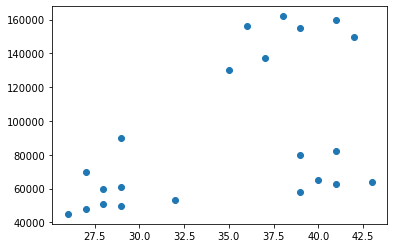

In [4]:
plt.scatter(df['Age'],df['Income($)'])

kinda see 3 clusters here

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


rob belongs cluster 2 ismail belongs 0

In [8]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


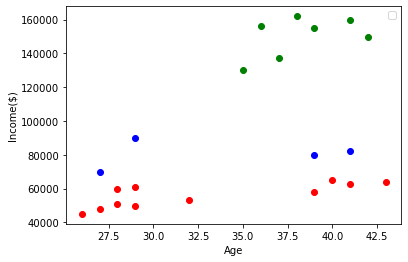

In [10]:
plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df0.Age,df0['Income($)'],color="red")
plt.scatter(df2.Age,df2['Income($)'],color="blue")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

u can notice that its not proper 


the reason why is the scaling of y axis is differnt from x axis

scale down age and income to bw 0 and 1

In [15]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)']=scalar.transform(df[['Income($)']])
scalar.fit(df[['Age']])
df['Age']=scalar.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


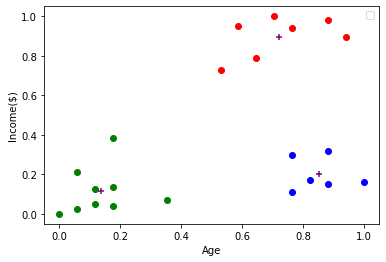

In [22]:
y_pred=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_pred
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df0.Age,df0['Income($)'],color="red")
plt.scatter(df2.Age,df2['Income($)'],color="blue")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="+")



plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [18]:
km.cluster_centers_


array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

u plotted the scattered plot easily saw there are 3 clusters and gave k as 3 

but in real life there could be many more cluttered data and u would be doing elbow method of getting to know the data

In [24]:
k_rng=range(1,10) # assumption its in bw 1-10
sse=[] # sum of sq err
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) # this km.insertia_ gives see

In [25]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2621792762345213,
 0.21055478995472487,
 0.16858512236029755,
 0.13706529523670866,
 0.10497488680620906]

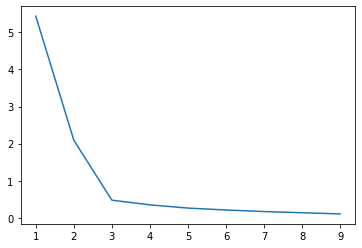

In [27]:
plt.plot(k_rng,sse)

notice the elbow is @ x=3